# Machine Learning - Assignment 5

#### Cindy Jeon(section 2)

# 1. Data Exploration and Visualization (20) :

- Explore Event_entry(in Files) dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the datasets
df = pd.read_csv("/Users/daeunjeon/Library/CloudStorage/GoogleDrive-jeond000@gmail.com/My Drive/MSBA UC DAVIS/Winter 2023/ BAX 452_Machine_Learning/HW/HW5/Event_entry.csv")

In [3]:
# Display first six observations
print(df.head(6))

# Check the structure of the data
print(df.info())

# Display the summary of the data
print(df.describe(include='all'))

   Entry  TicketClass     Sex   Age  Price  Order  \
0      0            3    male  22.0      7      1   
1      1            1  female  38.0     71      2   
2      1            3  female  26.0      8      3   
3      1            1  female  35.0     53      4   
4      0            3    male  35.0      8      5   
5      0            3    male   NaN      8      6   

                                                Name  Ticket Number  \
0                            Braund, Mr. Owen Harris         648155   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...         119239   
2                             Heikkinen, Miss. Laina         411408   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)         530093   
4                           Allen, Mr. William Henry         510583   
5                                   Moran, Mr. James         664358   

   Bank Balance  
0         74389  
1         94932  
2         26146  
3         35627  
4         60457  
5         30640  
<cla

# # Exploring data with histogram (after dealing with price, car)

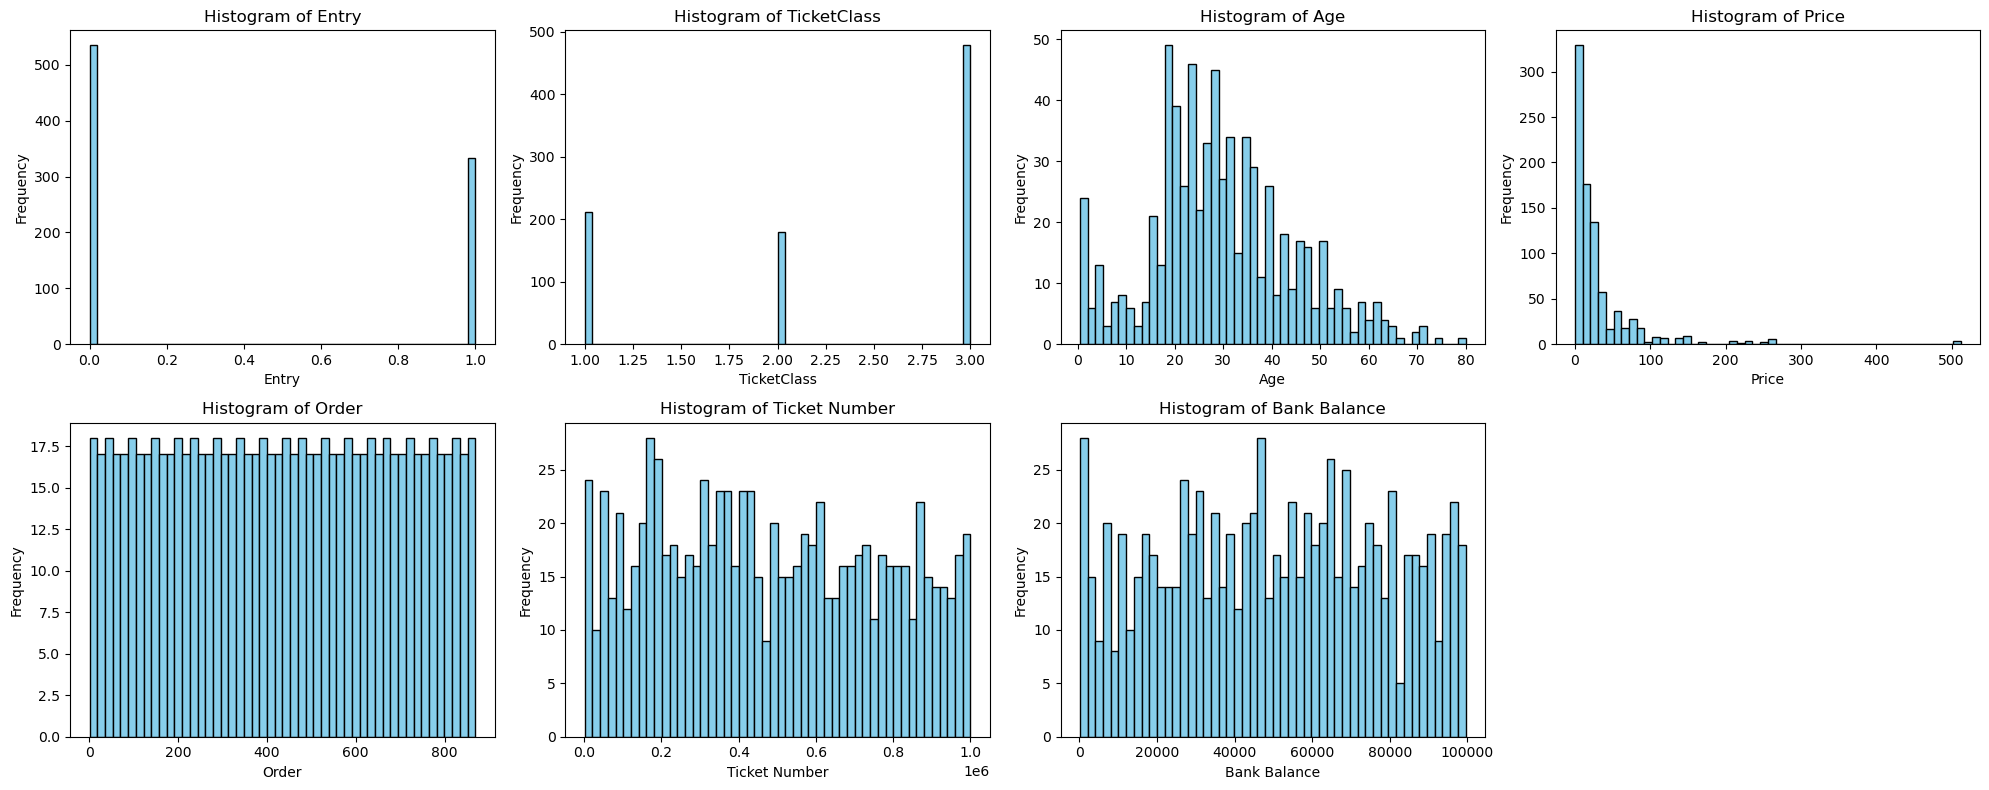

In [4]:
# Filtering out non-numeric columns and columns with all null values
numeric_df = df.select_dtypes(include=[np.number])

# Number of numeric variables
num_vars = len(numeric_df.columns)

# Calculate the number of rows and columns for the subplots
n_cols = 4  
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric variables and plot histograms
for ax, var in zip(axes, numeric_df.columns):
    ax.hist(numeric_df[var], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(numeric_df.columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()


- Price is highly righ skewed and it is focused around 0~50 dollar,indicating that the ticket price is not very high, however, there are 500dollar ticket, which also means its range is very wide.
- Age is distributed mainly from 20 to 30, but it is also wide from 0 to 80
- Bankbalance is somewhat evenly distributed from zero to 100K

# # Exploring data with correlation

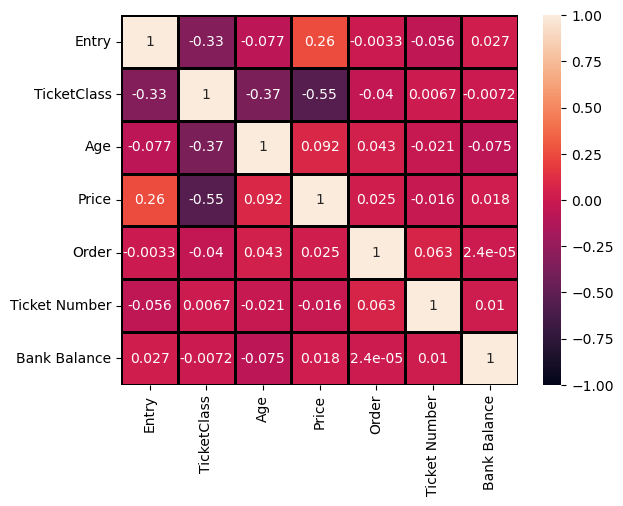

In [5]:
# Corrleation

numeric_df = df.select_dtypes(include=[np.number])
correlation = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')

- ticket class and price has mid-strong negative correlation
- ticket class and age has weak negative correlation
- ticket class and entry has weak negative correlation

# # Exploring data with boxplot to see the relation of price 

In [6]:
df_entered = df[df['Entry'] == 1]

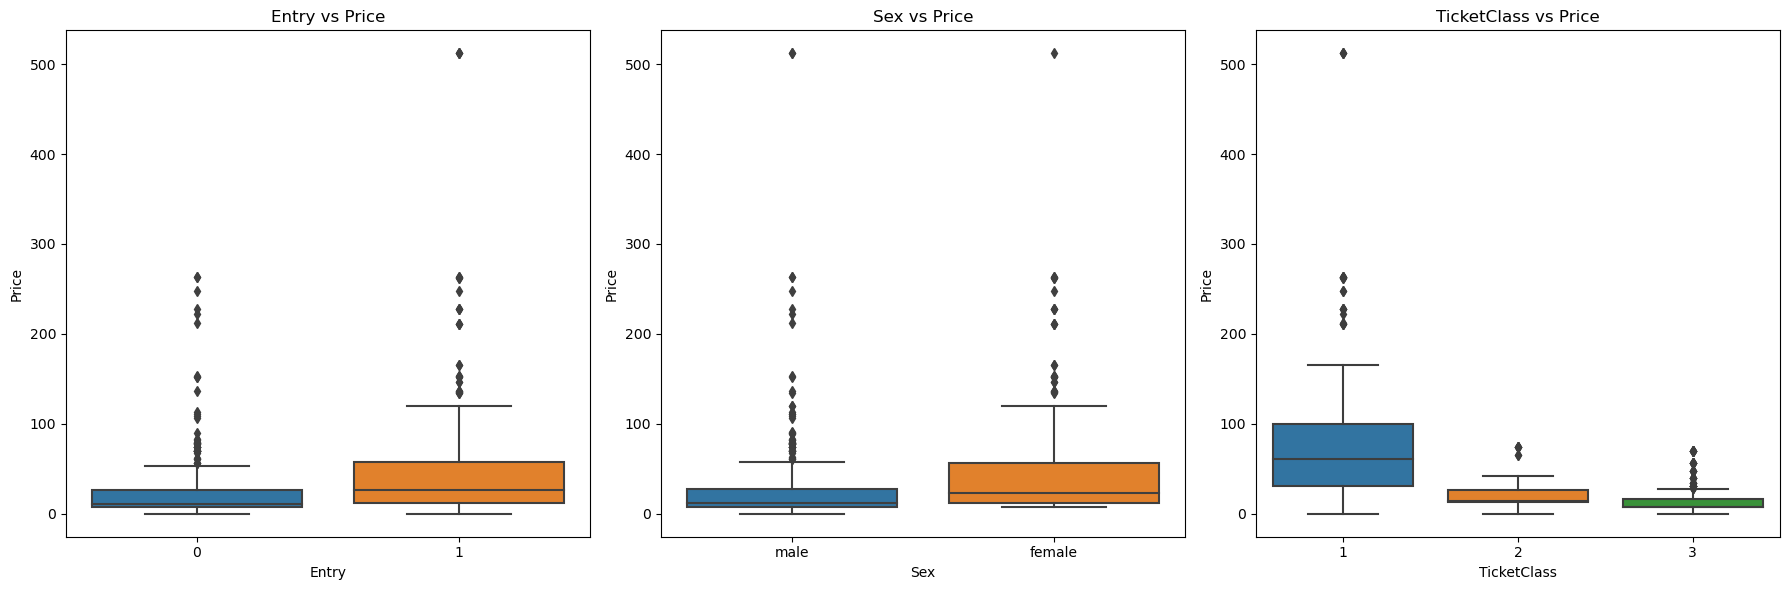

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a matplotlib figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed

# Boxplot for 'Entry' vs 'Price'
sns.boxplot(x='Entry', y='Price', data=df, ax=axes[0])
axes[0].set_title('Entry vs Price')

# Boxplot for 'Sex' vs 'Price'
sns.boxplot(x='Sex', y='Price', data=df, ax=axes[1])
axes[1].set_title('Sex vs Price')

# Boxplot for 'TicketClass' vs 'Price'
sns.boxplot(x='TicketClass', y='Price', data=df, ax=axes[2])
axes[2].set_title('TicketClass vs Price')

# Show the plot
plt.tight_layout()  # Automatically adjust subplot params to give specified padding
plt.show()


- Entry vs Price : the mean price of ticket is higher for people who got approved and its range is bigger
- Sex vs Price : Female has higher mean which means they paid expensive price for the ticket than male
- TicketClass vs Price : First class ticket mean is the most expensive and the second and third are almost same

# # Check for missing values

In [8]:
# Count of the missing values of the dataset
missing_values = df.isna().sum()
missing_values

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

In [9]:
##check the percentage of missing values for df
def display_missing_perc(df):    
    for col in df.columns.tolist():       
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value:.2f}%')
  
display_missing_perc(df)

Entry column missing values: 0.00%
TicketClass column missing values: 0.00%
Sex column missing values: 0.00%
Age column missing values: 20.14%
Price column missing values: 0.00%
Order column missing values: 0.00%
Name column missing values: 0.00%
Ticket Number column missing values: 0.00%
Bank Balance column missing values: 0.00%


## *The missing values
- 175 missing value exist in age and it is only 20% of its total, I will either fill na with average or remove the rows

# # Cleaning the data

In [10]:
# Dropping age colum with missing value
df_drop_age = df.dropna(subset=['Age'])

In [11]:
# fill the age missing value with mean
df_mean_age = df.copy()  
df_mean_age['Age'] = df_mean_age['Age'].fillna(df_mean_age['Age'].mean())

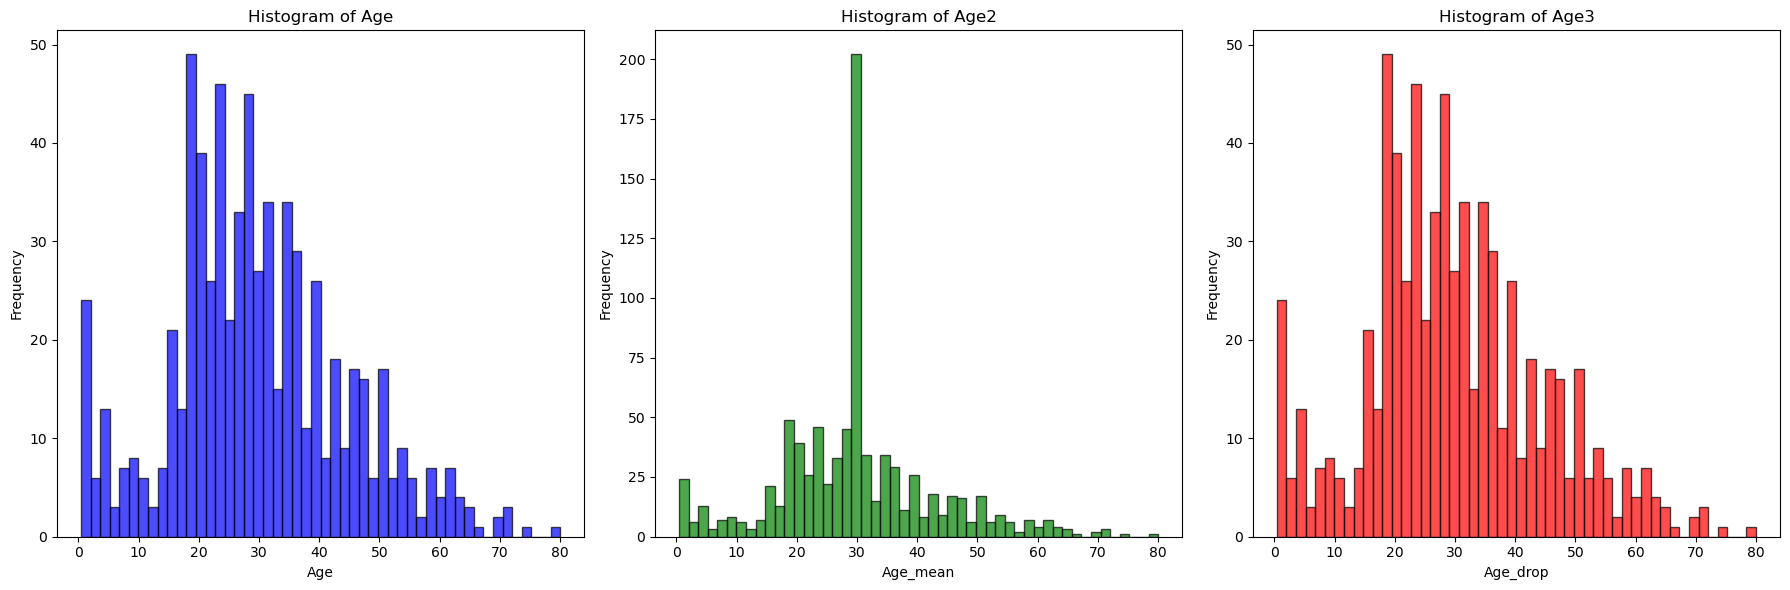

In [12]:
# drow histogram to compare 

plt.figure(figsize=(18, 6))

# Histogram for the 'age' column
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.hist(df['Age'], color='blue', bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for the 'age2' column
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.hist(df_mean_age['Age'], color='green',bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Age2')
plt.xlabel('Age_mean')
plt.ylabel('Frequency')

# Histogram for the 'age3' column
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.hist(df_drop_age['Age'], color='red',bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Age3')
plt.xlabel('Age_drop')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


- the histogram with mean looks too much focused on age 30 and it looks too different from the original graph, and the percentage of missing value is 20% of the total data, therefore, I will drop the missing value for age.

In [13]:
# change the name of df_drop_age to df
df = df_drop_age

## 2. PCA Analysis

##### Split the dataset into training and testing sets and encode the variables if needed. Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions) Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance. Compare the OOS performance with that of a LASSO Logistic Regression Model.

In [14]:
# Encode 'male' as 0 and 'female' as 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Verify that the encoding is correct
print(df[['Sex']].head())

   Sex
0    0
1    1
2    1
3    1
4    0


In [15]:
# Convert the float column to int
df['Age'] = df['Age'].astype(int)
print(df[['Age']].head())

   Age
0   22
1   38
2   26
3   35
4   35


In [16]:
# Drop the target variable and any non-numeric columns
X_split = df.select_dtypes(include=[np.number]).drop(['Entry'], axis=1)
y_split = df['Entry']  # Target variable

X_split.head()

,TicketClass,Sex,Age,Price,Order,Ticket Number,Bank Balance
0,3,0,22,7,1,648155,74389
1,1,1,38,71,2,119239,94932
2,3,1,26,8,3,411408,26146
3,1,1,35,53,4,530093,35627
4,3,0,35,8,5,510583,60457


In [17]:
y_split.head()

0    0
1    1
2    1
3    1
4    0
Name: Entry, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.2, random_state=42)

In [19]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
# Lasso with ATLEAST 6 dimensions (original model)

from sklearn.linear_model import Lasso, LogisticRegression

lasso_main = LogisticRegression(penalty='l1',solver='liblinear')
lasso_main.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [21]:
# Predict on test/train set
y_test_pred = lasso_main.predict(X_test_scaled)
y_train_pred = lasso_main.predict(X_train_scaled)

# Threshold probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_test_pred >= threshold).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

0.8273381294964028

In [22]:
# Evaluating the model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(test_r2)

0.2503370786516853


AUC : 0.8169662921348315


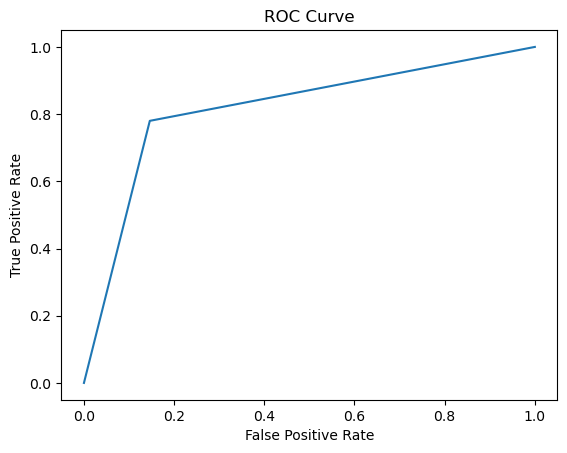

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Predict on test set
y_test_pred = lasso_main.predict(X_test_scaled)

# Threshold probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_test_pred >= threshold).astype(int)

#ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_test_pred)

#AUC
AUC= auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print(f'AUC : {AUC}')

#### Insights:

- The model classifies entries with an accuracy of 83%, with an AUC of 82%. The ROC curve suggests good classification performance. Overall indicating that the model has a good predictive ability. 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

n_components= [2, 4, 6]
X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.2, random_state=42)

# Loop over the number of components
for i in n_components:
    
    # Apply PCA
    pca = PCA(n_components=i)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Fit the LASSO model
    lasso_model = Lasso(alpha=0.001)
    lasso_model.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = lasso_model.predict(X_test_pca)

    # Threshold probabilities to get binary predictions
    threshold = 0.5
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    # Printing accuracies for 2, 4, 6 dimensions
    print(f"The accuracy for a {i} dimension LASSO regression is: {accuracy}")

The accuracy for a 2 dimension LASSO regression is: 0.7985611510791367
The accuracy for a 4 dimension LASSO regression is: 0.8129496402877698
The accuracy for a 6 dimension LASSO regression is: 0.8057553956834532


#### Insights:

- The accuracy is highest with 4 dimentions and lowest with 2 which means that 4 dimention model performs the best.

- When compared to the original Logistic Regression model, the original one has a higher accuracy (83%) and performs better than PCA.

## 3. Decision Tree Analysis

##### Split the dataset into training and testing sets and encode the variables if needed. Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.) Explain the steps clearly that you took in preparing the data and developing the model, feel free to remove unnecessary columns. Train the decision tree classifier using the training data. Predict the accuracy of model using test data and explain the results.


### 1) check multicolinearity of data

In [25]:
# Assuming 'df' is your DataFrame and it contains only numeric variables
# Filtering out non-numeric columns and columns with all null values
numeric_df = df.select_dtypes(include=[np.number])

# Add a constant term (intercept) to the predictors
X = add_constant(numeric_df)

# Create a DataFrame to hold VIF scores
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable        VIF
0          const  44.707953
1          Entry   1.636455
2    TicketClass   1.912584
3            Sex   1.429698
4            Age   1.262464
5          Price   1.498121
6          Order   1.012603
7  Ticket Number   1.009233
8   Bank Balance   1.008760


- It seems there is no multicolinearity

### 2) Checking the number of categorical data

In [26]:
# Select columns that are not of numeric data type
non_numeric_df = df.select_dtypes(exclude=[np.number])
non_numeric_df.head(5)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


- There are 2 categorical data, and I will use dummie variable for Sex and drop the name column

### 3) make dummie variables for categorical data

In [27]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=False, prefix='dummy', dtype=int)

In [28]:
df.dtypes

Entry             int64
TicketClass       int64
Age               int64
Price             int64
Order             int64
Name             object
Ticket Number     int64
Bank Balance      int64
dummy_0           int64
dummy_1           int64
dtype: object

### 4) Split the data for training and test

In [29]:
#Select features and target values
features = ['Age', 'Price', 'Bank Balance', 'dummy_male']
target = 'Entry'

- Order / Name / ticket number variables were removed since they are not irrelevant 

In [30]:
#Split dataset to train/test

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

KeyError: "['dummy_male'] not in index"

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

In [ ]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy: {:.3f}'.format(acc_train))
print('Testing Accuracy: {:.3f}'.format(acc_test))

In [ ]:
#calcuate MSE
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print('MSE: {:.3f}'.format(mse))

### # Interpretation : 

- Training Accuracy 0.793 : This indicates that the model correctly predicts the outcome for approximately 79.3% of the cases in the training dataset.
- Testing Accuracy 0.791 :This shows that when the model is applied to new, unseen data, it correctly predicts the outcome for about 79.1% of the cases.
- MSE 0.209 : On average, the square of the difference between the actual and predicted outcomes in the testing dataset is 0.209. The lower the MSE, the closer a model's predictions are to the actual values, indicating better performance. 

#### *Summary : The model demonstrates good generalization from the training data to the testing data, as indicated by the high testing accuracy. The relatively low MSE further suggests that the model's predictions are, on average, close to the actual values, which is desirable in predictive modeling.


## 4. K Means Clustering

##### Use the Entry_event database and use the Age and Price columns only (drop all other columns) Perform K means clustering for different values of K. Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications. Create the clusters using the above value of K. Plot a graph to show the different clusters.

### 1) Use the Age and Price columns only (drop all other columns)

In [33]:
# use the data with age missing value udpated with mean
df= df_mean_age

In [34]:
Selected_K = df.iloc[:,3:5]
print(Selected_K)

           Age  Price
0    22.000000      7
1    38.000000     71
2    26.000000      8
3    35.000000     53
4    35.000000      8
..         ...    ...
864  24.000000     13
865  42.000000     13
866  27.000000     14
867  31.000000     50
868  29.732233     10

[869 rows x 2 columns]


### 2) Perform K means clustering for different values of K. 

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(Selected_K)
scaled_df = pd.DataFrame(scaled_data, columns=Selected_K.columns)  # Ensure columns are correctly assigned

# Perform K-Means Clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster_k_2'] = kmeans.labels_

# Print the result
scaled_df

,Age,Price,Cluster_k_2
0,0.271174,0.013672,1
1,0.472229,0.138672,0
2,0.321438,0.015625,1
3,0.434531,0.103516,1
4,0.434531,0.015625,1
...,...,...,...
864,0.296306,0.025391,1
865,0.522493,0.025391,0
866,0.334004,0.027344,1
867,0.384267,0.097656,1


In [36]:
# Perform K-Means Clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster_k_4'] = kmeans.labels_

# Print the result
scaled_df

,Age,Price,Cluster_k_2,Cluster_k_4
0,0.271174,0.013672,1,2
1,0.472229,0.138672,0,1
2,0.321438,0.015625,1,2
3,0.434531,0.103516,1,2
4,0.434531,0.015625,1,2
...,...,...,...,...
864,0.296306,0.025391,1,2
865,0.522493,0.025391,0,1
866,0.334004,0.027344,1,2
867,0.384267,0.097656,1,2


In [37]:
# Perform K-Means Clustering (k=6)
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster_k_6'] = kmeans.labels_

# Print the result
scaled_df

,Age,Price,Cluster_k_2,Cluster_k_4,Cluster_k_6
0,0.271174,0.013672,1,2,0
1,0.472229,0.138672,0,1,5
2,0.321438,0.015625,1,2,0
3,0.434531,0.103516,1,2,0
4,0.434531,0.015625,1,2,0
...,...,...,...,...,...
864,0.296306,0.025391,1,2,0
865,0.522493,0.025391,0,1,5
866,0.334004,0.027344,1,2,0
867,0.384267,0.097656,1,2,0


### 3) Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications. 

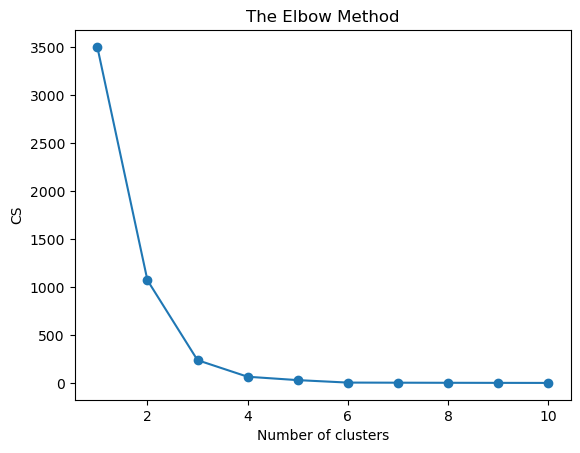

In [38]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

- based on the graph, we see that the rate of decrease changes on 3, therefore, k = 3

### 4) Create the clusters using the above value of K. Plot a graph to show the different clusters.

In [39]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Best_kmeans_cluster'] = kmeans.labels_

# Print the result
scaled_df

,Age,Price,Cluster_k_2,Cluster_k_4,Cluster_k_6,Best_kmeans_cluster
0,0.271174,0.013672,1,2,0,2
1,0.472229,0.138672,0,1,5,1
2,0.321438,0.015625,1,2,0,2
3,0.434531,0.103516,1,2,0,2
4,0.434531,0.015625,1,2,0,2
...,...,...,...,...,...,...
864,0.296306,0.025391,1,2,0,2
865,0.522493,0.025391,0,1,5,1
866,0.334004,0.027344,1,2,0,2
867,0.384267,0.097656,1,2,0,2


In [40]:
scaled_df['Best_kmeans_cluster'].value_counts()

Best_kmeans_cluster
2    473
0    254
1    142
Name: count, dtype: int64

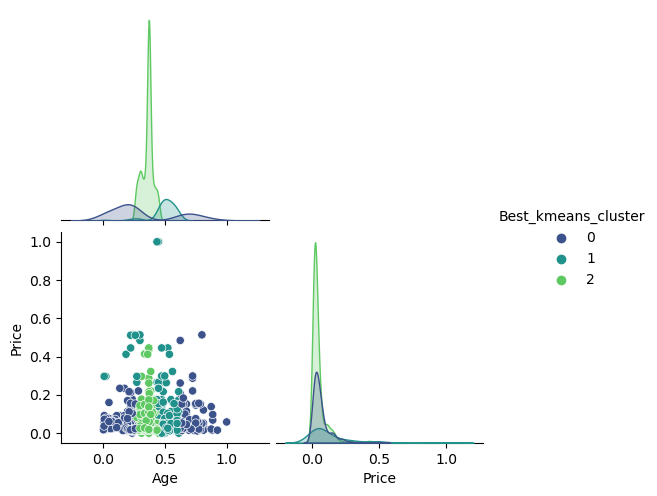

In [41]:
# First, ensure that the 'cluster' column is of a categorical type for better color handling
scaled_df['Best_kmeans_cluster'] = scaled_df['Best_kmeans_cluster'].astype('category')
scaled_df_B = scaled_df.iloc[:, [0,1,5]]
scaled_df_B

# Create the pairplot
sns.pairplot(scaled_df_B, hue='Best_kmeans_cluster', palette='viridis', corner=True)
plt.show()

In [42]:
print(scaled_df_B)

          Age     Price Best_kmeans_cluster
0    0.271174  0.013672                   2
1    0.472229  0.138672                   1
2    0.321438  0.015625                   2
3    0.434531  0.103516                   2
4    0.434531  0.015625                   2
..        ...       ...                 ...
864  0.296306  0.025391                   2
865  0.522493  0.025391                   1
866  0.334004  0.027344                   2
867  0.384267  0.097656                   2
868  0.368337  0.019531                   2

[869 rows x 3 columns]


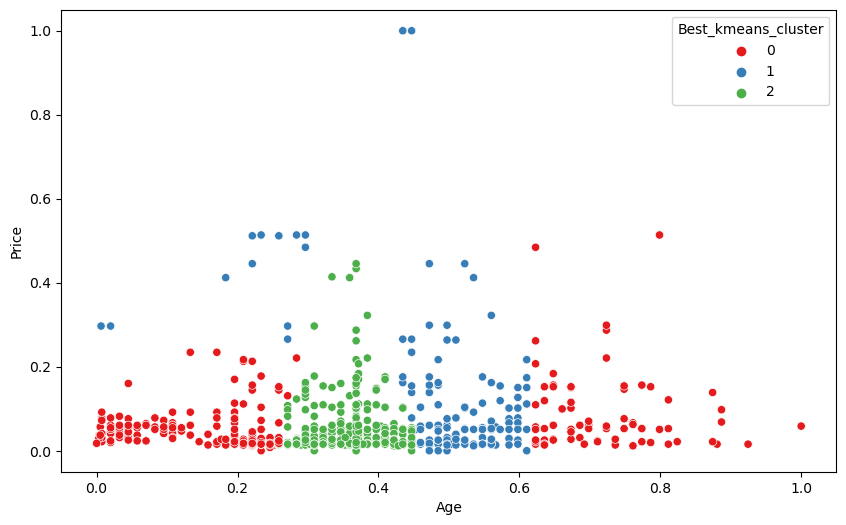

In [43]:
plt.figure(figsize=(10,6))  # Optional: You can specify the figure size
sns.scatterplot(data=scaled_df_B, x='Age', y='Price', hue='Best_kmeans_cluster', palette='Set1')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_df_B, kmeans.labels_)

0.8437475508808664

The silhouette score is `0.844`,which seems pretty high. The high score indicates that, on average, each data point is closer to the other points in its cluster than to points in other clusters. This means the clusters are dense and well-separated from each other. It also means that the model is excellent providing a strong foundation for any subsequent analysis based on these clusters. 